# DFA Design Exercise

Design a DFA that accepts strings which are multiples of 3 in value
and contain a 100 in them.

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA import *
from jove.LangDef    import *  # for testing DFA actions
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 18.74 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

# Mod-3 DFA 

Does it matter whether MSB-first or LSB-first?



Generating LALR tables


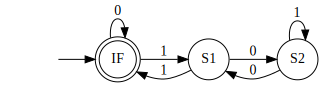

In [ ]:
DFA3 = md2mc('''DFA

IF : 0 -> IF
IF : 1 -> S1 

S1 : 0 -> S2
S1 : 1 -> IF

S2 : 0 -> S1
S2 : 1 -> S2


''')

dotObj_dfa(DFA3)

# DFA for "contains 100"

In [ ]:
DFA100 = md2mc(''' DFA

I : 0 -> I
I : 1 -> S1

S1  : 0 -> S10
S1  : 1 -> S1

S10 : 0 -> F
S10 : 1 -> S1


F   : 0|1 -> F

''')

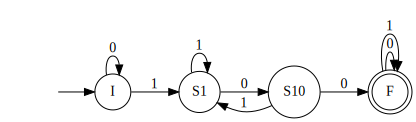

In [ ]:
dotObj_dfa(DFA100)

In [ ]:
help(intersect_dfa)

Help on function intersect_dfa in module jove.Def_DFA:

intersect_dfa(D1in, D2in)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
    Out: DFA for language intersection of D1in, D2in (consistent DFA).



In [ ]:
DFA3_100 = intersect_dfa(DFA3, DFA100)
DFA3_100

{'Delta': {(('IF', 'F'), '0'): ('IF', 'F'),
  (('IF', 'F'), '1'): ('S1', 'F'),
  (('IF', 'I'), '0'): ('IF', 'I'),
  (('IF', 'I'), '1'): ('S1', 'S1'),
  (('IF', 'S1'), '0'): ('IF', 'S10'),
  (('IF', 'S1'), '1'): ('S1', 'S1'),
  (('IF', 'S10'), '0'): ('IF', 'F'),
  (('IF', 'S10'), '1'): ('S1', 'S1'),
  (('S1', 'F'), '0'): ('S2', 'F'),
  (('S1', 'F'), '1'): ('IF', 'F'),
  (('S1', 'S1'), '0'): ('S2', 'S10'),
  (('S1', 'S1'), '1'): ('IF', 'S1'),
  (('S1', 'S10'), '0'): ('S2', 'F'),
  (('S1', 'S10'), '1'): ('IF', 'S1'),
  (('S2', 'F'), '0'): ('S1', 'F'),
  (('S2', 'F'), '1'): ('S2', 'F'),
  (('S2', 'S1'), '0'): ('S1', 'S10'),
  (('S2', 'S1'), '1'): ('S2', 'S1'),
  (('S2', 'S10'), '0'): ('S1', 'F'),
  (('S2', 'S10'), '1'): ('S2', 'S1')},
 'F': {('IF', 'F')},
 'Q': {('IF', 'F'),
  ('IF', 'I'),
  ('IF', 'S1'),
  ('IF', 'S10'),
  ('S1', 'F'),
  ('S1', 'S1'),
  ('S1', 'S10'),
  ('S2', 'F'),
  ('S2', 'S1'),
  ('S2', 'S10')},
 'Sigma': {'0', '1'},
 'q0': ('IF', 'I')}

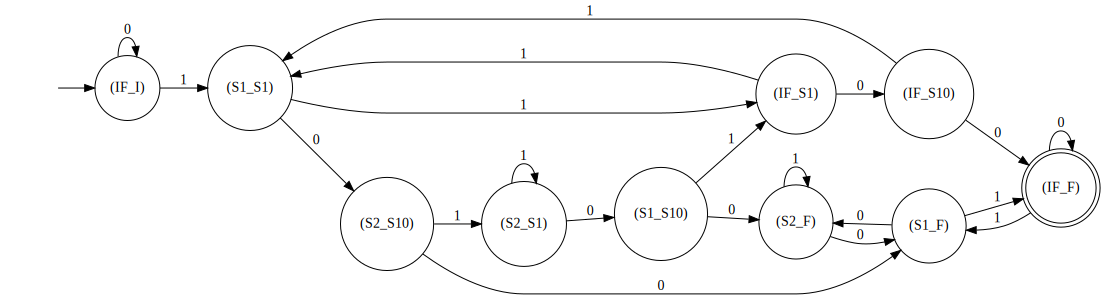

In [ ]:
min_DFA3_100 = min_dfa(DFA3_100)
dotObj_dfa(min_DFA3_100)

In [ ]:
len(DFA3_100["Q"])

10

In [ ]:
len(min_DFA3_100["Q"])

10

# Observation: even the minimal DFA can be large!

# Illustrate Regular Expression to generate test DFA

In [ ]:
re2nfa('00*(0+1*)')

Generating LALR tables


{'Delta': {('St1', '0'): {'St2'},
  ('St10', ''): {'St8'},
  ('St2', ''): {'St5'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St5', ''): {'St10', 'St3', 'St6'},
  ('St6', '0'): {'St7'},
  ('St8', '1'): {'St9'},
  ('St9', ''): {'St10'}},
 'F': {'St10', 'St7'},
 'Q': {'St1', 'St10', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Q0': {'St1'},
 'Sigma': {'0', '1'}}

In [ ]:
nd = nfa2dfa(re2nfa('00*(0+1*)'))
nd

Generating LALR tables


{'Delta': {('BH', '0'): 'BH',
  ('BH', '1'): 'BH',
  ('St1', '0'): 'St2',
  ('St1', '1'): 'BH',
  ('St2', '0'): 'St3',
  ('St2', '1'): 'St4',
  ('St3', '0'): 'St3',
  ('St3', '1'): 'St4',
  ('St4', '0'): 'BH',
  ('St4', '1'): 'St4'},
 'F': {'St2', 'St3', 'St4'},
 'Q': {'BH', 'St1', 'St2', 'St3', 'St4'},
 'Sigma': {'0', '1'},
 'q0': 'St1'}

In [ ]:
mnd = min_dfa(nd, state_name_mode='verbose')
mnd

{'Delta': {('BH', '0'): 'BH',
  ('BH', '1'): 'BH',
  ('St1', '0'): 'St3_St2',
  ('St1', '1'): 'BH',
  ('St3_St2', '0'): 'St3_St2',
  ('St3_St2', '1'): 'St4',
  ('St4', '0'): 'BH',
  ('St4', '1'): 'St4'},
 'F': {'St3_St2', 'St4'},
 'Q': {'BH', 'St1', 'St3_St2', 'St4'},
 'Sigma': {'0', '1'},
 'q0': 'St1'}

In [ ]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



In [ ]:
len(nd["Q"])

5

In [ ]:
len(mnd["Q"])

4

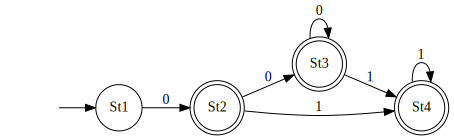

In [ ]:
dotObj_dfa(nd, STATENAME_MAXSIZE=40)

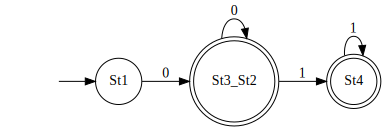

In [ ]:
dotObj_dfa(mnd)

<br>

<br>

# Caleb S. Fullmer Comments:

I went through the document with Clara Chan and Matthew Loumeau and learned how to use the intersect_dfa, min_dfa, and re2nfa functions.